In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv('data/test_table.csv')
user_df = pd.read_csv('data/user_table.csv')

# EDA

In [3]:
data = test_df.merge(user_df, on='user_id', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           453321 non-null  int64  
 1   date              453321 non-null  object 
 2   source            453321 non-null  object 
 3   device            453321 non-null  object 
 4   browser_language  453321 non-null  object 
 5   ads_channel       181877 non-null  object 
 6   browser           453321 non-null  object 
 7   conversion        453321 non-null  int64  
 8   test              453321 non-null  int64  
 9   sex               452867 non-null  object 
 10  age               452867 non-null  float64
 11  country           452867 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


In [4]:
# remove missing values and data test in Spain
data = data[data['country']!='Spain']
data = data.dropna(subset=['country'])
# remove ads_channel, too many missing values
data = data.drop(['ads_channel'], axis = 1)

In [5]:
conversion_rate = data.pivot_table(values='conversion', index='test', aggfunc=np.sum)
conversion_rate['total test'] = data.pivot_table(values='conversion', index='test', aggfunc=lambda x: len(x))
conversion_rate['conversion_rate (100%)'] = conversion_rate['conversion'] / conversion_rate['total test'] * 100
conversion_rate.index = ['control','test']
conversion_rate

,conversion,total test,conversion_rate (100%)
control,8949,185311,4.829179
test,9367,215774,4.341116


In [6]:
control = data[data['test']==0]
test = data[data['test']==1]

The control group has a higher conversion rate than the test group, the test is negative. There's no enough evidence to show the new version with localized translation will increase conversion rate.


Assume that conversion rate of a certain category is either extremely high or low, tilting the data. I observed conversion rate differences of each value for different features.

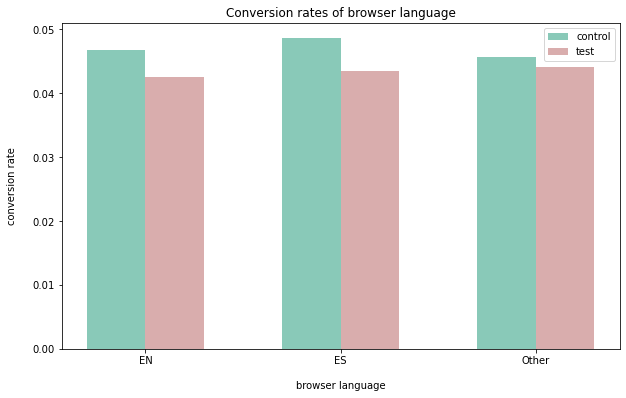

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ind = np.arange(len(data['browser_language'].dropna().unique()))
width = 0.3
control_rate = control.groupby('browser_language')['conversion'].sum() / control['browser_language'].value_counts()
test_rate = test.groupby('browser_language')['conversion'].sum() / test['browser_language'].value_counts()
p1 = ax.bar(ind, control_rate, width=width, label='control', color='#89c9b8')
p2 = ax.bar(ind+width, test_rate, width=width, label='test', color='#d9adad')
ax.set_title('Conversion rates of browser language')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sorted(data['browser_language'].dropna().unique()))
ax.set_xlabel('browser language', labelpad=15)
ax.set_ylabel('conversion rate', labelpad=15)
plt.legend()
plt.show()

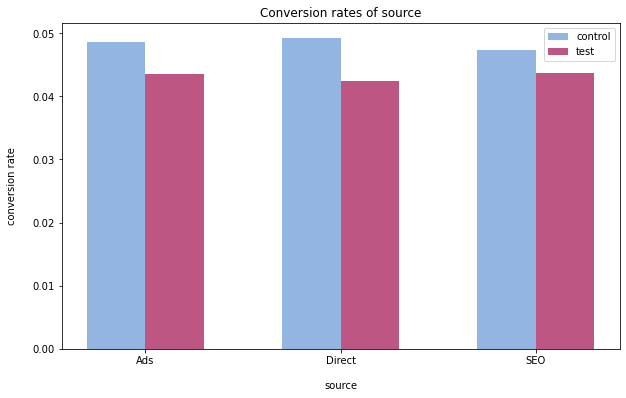

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ind = np.arange(len(data['source'].dropna().unique()))
width = 0.3
control_rate = control.groupby('source')['conversion'].sum() / control['source'].value_counts()
test_rate = test.groupby('source')['conversion'].sum() / test['source'].value_counts()
p1 = ax.bar(ind, control_rate, width=width, label='control', color='#93b5e1')
p2 = ax.bar(ind+width, test_rate, width=width, label='test', color='#be5683')
ax.set_title('Conversion rates of source')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sorted(data['source'].dropna().unique()))
ax.set_xlabel('source', labelpad=15)
ax.set_ylabel('conversion rate', labelpad=15)
plt.legend()
plt.show()

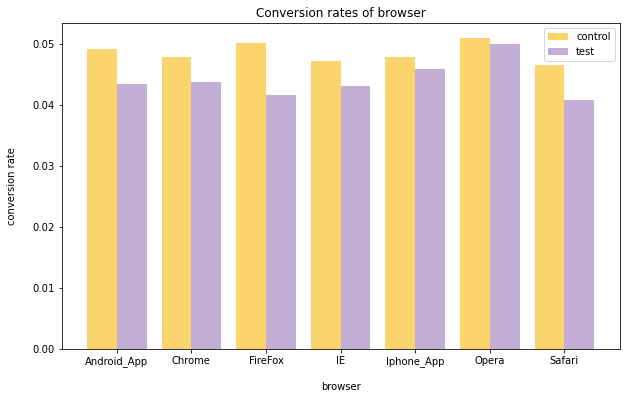

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ind = np.arange(len(data['browser'].dropna().unique()))
width = 0.4
control_rate = control.groupby('browser')['conversion'].sum() / control['browser'].value_counts()
test_rate = test.groupby('browser')['conversion'].sum() / test['browser'].value_counts()
p1 = ax.bar(ind, control_rate, width=width, label='control', color='#fbd46d')
p2 = ax.bar(ind+width, test_rate, width=width, label='test', color='#c3aed6')
ax.set_title('Conversion rates of browser')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sorted(data['browser'].dropna().unique()))
ax.set_xlabel('browser', labelpad=15)
ax.set_ylabel('conversion rate', labelpad=15)
plt.legend()
plt.show()

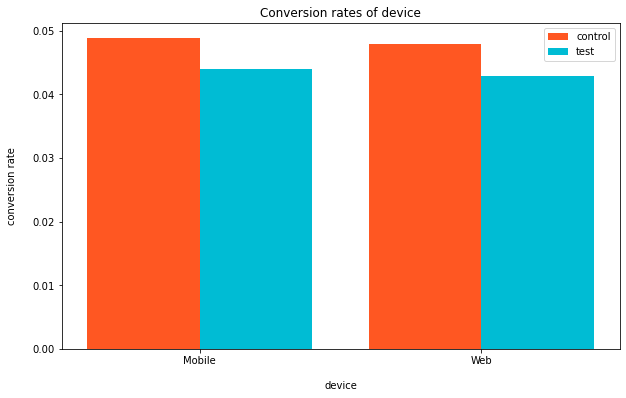

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ind = np.arange(len(data['device'].dropna().unique()))
width = 0.4
control_rate = control.groupby('device')['conversion'].sum() / control['device'].value_counts()
test_rate = test.groupby('device')['conversion'].sum() / test['device'].value_counts()
p1 = ax.bar(ind, control_rate, width=width, label='control', color='#ff5722')
p2 = ax.bar(ind+width, test_rate, width=width, label='test', color='#00bcd4')
ax.set_title('Conversion rates of device')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sorted(data['device'].dropna().unique()))
ax.set_xlabel('device', labelpad=15)
ax.set_ylabel('conversion rate', labelpad=15)
plt.legend()
plt.show()

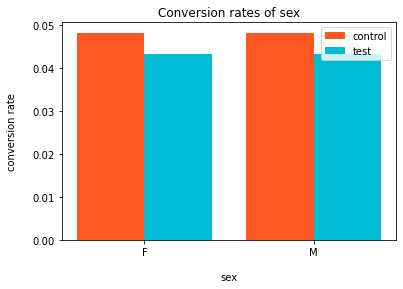

In [11]:
fig, ax = plt.subplots()
ind = np.arange(len(data['sex'].dropna().unique()))
width = 0.4
control_rate = control.groupby('sex')['conversion'].sum() / control['sex'].value_counts()
test_rate = test.groupby('sex')['conversion'].sum() / test['sex'].value_counts()
p1 = ax.bar(ind, control_rate, width=width, label='control', color='#ff5722')
p2 = ax.bar(ind+width, test_rate, width=width, label='test', color='#00bcd4')
ax.set_title('Conversion rates of sex')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sorted(data['sex'].dropna().unique()))
ax.set_xlabel('sex', labelpad=15)
ax.set_ylabel('conversion rate', labelpad=15)
plt.legend()
plt.show()

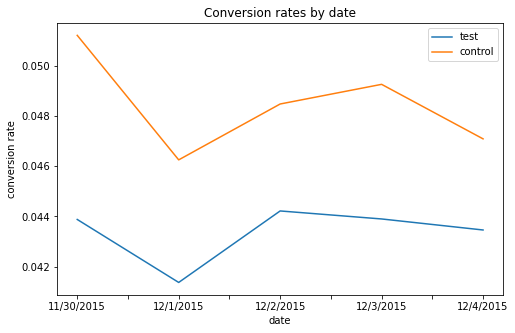

In [12]:
fig = data[data.test==1][['date', 'conversion']].groupby('date').mean().plot(figsize=(8, 5))
data[data.test==0][['date', 'conversion']].groupby('date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Conversion rates by date')
plt.ylabel("conversion rate")
plt.show()

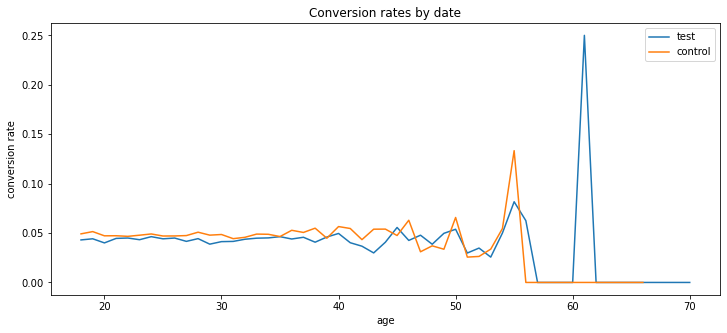

In [13]:
fig = data[data.test==1][['age', 'conversion']].groupby('age').mean().plot(figsize=(12, 5))
data[data.test==0][['age', 'conversion']].groupby('age').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Conversion rates by date')
plt.ylabel("conversion rate")
plt.show()

Text(0.5, 1.0, 'Sample age distribution')

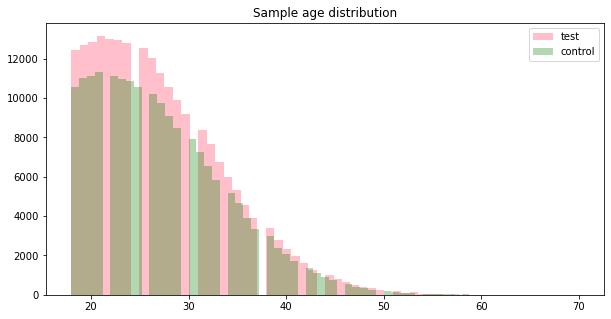

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.hist(test['age'],bins=60,color='pink',label='test')
plt.hist(control['age'],bins=60,color='green',alpha=0.3,label='control')
plt.legend()
plt.title('Sample age distribution')

In [15]:
conversion_rate = data.pivot_table(values='conversion', index=('test','country'), aggfunc=np.sum)
conversion_rate['total test'] = data.pivot_table(values='conversion', index=('test','country'), aggfunc=lambda x: len(x))
conversion_rate['conversion_rate (100%)'] = conversion_rate['conversion'] / conversion_rate['total test'] * 100
conversion_rate

conversion  total test  conversion_rate (100%)
test country                                                    
0    Argentina           141        9356                1.507054
     Bolivia             274        5550                4.936937
     Chile               474        9853                4.810718
     Colombia           1411       27088                5.208949
     Costa Rica          139        2660                5.225564
     Ecuador             395        8036                4.915381
     El Salvador         220        4108                5.355404
     Guatemala           386        7622                5.064288
     Honduras            222        4361                5.090576
     Mexico             3178       64209                4.949462
     Nicaragua           180        3419                5.264697
     Panama               92        1966                4.679552
     Paraguay            177        3650                4.849315
     Peru                842       16869                4.991404
     Uruguay               5         415                1.204819
     Venezuela           813       16149                5.034367
1    Argentina           513       37377                1.372502
     Bolivia             267        5574                4.790097
     Chile               507        9884                5.129502
     Colombia           1364       26972                5.057096
     Costa Rica          145        2649                5.473764
     Ecuador             385        7859                4.898842
     El Salvador         195        4067                4.794689
     Guatemala           365        7503                4.864721
     Honduras            200        4207                4.753981
     Mexico             3290       64275                5.118631
     Nicaragua           179        3304                5.417676
     Panama               98        1985                4.937028
     Paraguay            182        3697                4.922910
     Peru                850       16797                5.060427
     Uruguay              48        3719                1.290670
     Venezuela           779       15905                4.897831

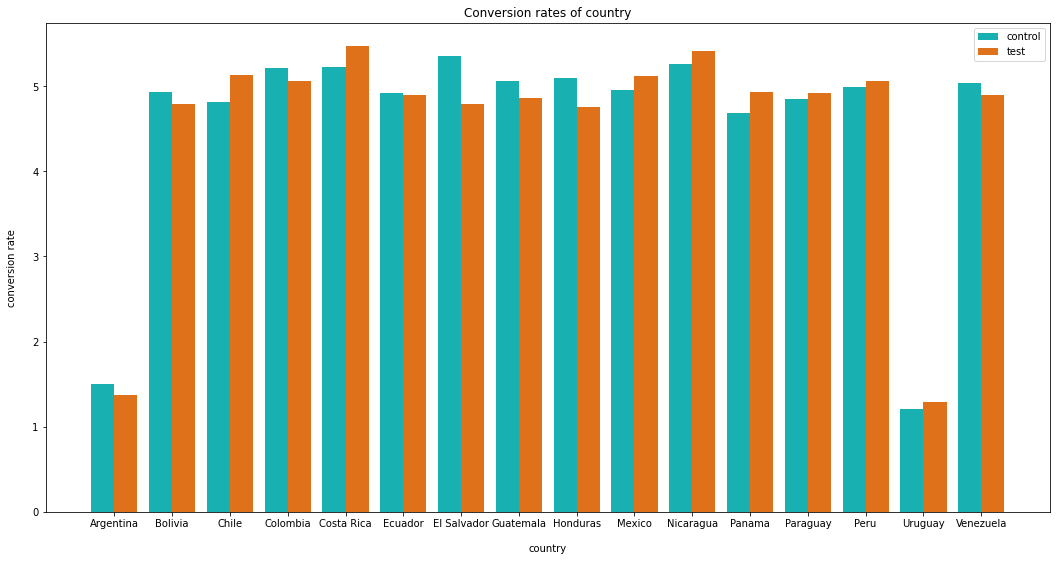

In [16]:
fig, ax = plt.subplots(figsize=(18, 9))
ind = np.arange(len(data['country'].dropna().unique()))
width = 0.4
control = data[data['test']==0]
test = data[data['test']==1]
control_rate = control.groupby('country')['conversion'].sum() / control['country'].value_counts() * 100
test_rate = test.groupby('country')['conversion'].sum() / test['country'].value_counts() * 100
p1 = ax.bar(ind, control_rate, width=width, label='control',color='#18b0b0')
p2 = ax.bar(ind+width, test_rate, width=width, label='test',color='#de7119')
ax.set_title('Conversion rates of country')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sorted(data['country'].dropna().unique()))
ax.set_xlabel('country', labelpad=15)
ax.set_ylabel('conversion rate', labelpad=15)
plt.legend()
plt.show()

Argentina and Uruguay both have abnormally small conversion rates compared to other countries, should be removed.

In [17]:
data = data[(data['country'] != 'Argentina') & (data['country'] != 'Uruguay')]

In [18]:
conversion_rate = data.pivot_table(values='conversion', index='test', aggfunc=np.sum)
conversion_rate['total test'] = data.pivot_table(values='conversion', index='test', aggfunc=lambda x: len(x))
conversion_rate['conversion_rate (100%)'] = conversion_rate['conversion'] / conversion_rate['total test'] * 100
conversion_rate.index = ['control','test']
conversion_rate

,conversion,total test,conversion_rate (100%)
control,8803,175540,5.014811
test,8806,174678,5.041276


The conversion rate of test group is higher than that of control group now.


# Algorithm
design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.

set a threshold to verify if countries has extreme convrsion rates

In [27]:
def check():
    control_lower = conversion_rate['conversion_rate (100%)']['control'] * 0.6
    control_upper = conversion_rate['conversion_rate (100%)']['control'] * 1.4
    test_lower = conversion_rate['conversion_rate (100%)']['test'] * 0.6
    test_upper = conversion_rate['conversion_rate (100%)']['test'] * 1.4
    for i in data['country'].dropna().unique():
        if control_rate[i] < control_lower or control_rate[i] > control_upper:
            return False
        if test_rate[i] < test_lower or test_rate[i] > test_upper:
            return False
        return True

In [28]:
print(check())

True
